In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2023-11-02 21:28:41.400263: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 21:28:41.401552: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 21:28:41.428058: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 21:28:41.428787: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 21:28:41.955005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Raw data and annotation

In [2]:
# if os.path.isdir('train/barbutellus') is False:
#     os.makedirs('train/barbutellus')
#     os.makedirs('train/bohemicus')
#     os.makedirs('train/campestris')
#     os.makedirs('train/cryptarum')
#     os.makedirs('train/distinguendus')
#     os.makedirs('train/hortorum')
#     os.makedirs('train/hypnorum')
#     os.makedirs('train/jonellus')
#     os.makedirs('train/lapidarius')
#     os.makedirs('train/lucorum')
#     os.makedirs('train/magnus')
#     os.makedirs('train/monticola')
#     os.makedirs('train/muscorum')
#     os.makedirs('train/pascuorum')
#     os.makedirs('train/pratorum')
#     os.makedirs('train/ruderarius')
#     os.makedirs('train/rupestris')
#     os.makedirs('train/sylvarum')
#     os.makedirs('train/sylvestris')
#     os.makedirs('train/terrestris')
#     os.makedirs('train/vestalis')
    
#     os.makedirs('validate/barbutellus')
#     os.makedirs('validate/bohemicus')
#     os.makedirs('validate/campestris')
#     os.makedirs('validate/cryptarum')
#     os.makedirs('validate/distinguendus')
#     os.makedirs('validate/hortorum')
#     os.makedirs('validate/hypnorum')
#     os.makedirs('validate/jonellus')
#     os.makedirs('validate/lapidarius')
#     os.makedirs('validate/lucorum')
#     os.makedirs('validate/magnus')
#     os.makedirs('validate/monticola')
#     os.makedirs('validate/muscorum')
#     os.makedirs('validate/pascuorum')
#     os.makedirs('validate/pratorum')
#     os.makedirs('validate/ruderarius')
#     os.makedirs('validate/rupestris')
#     os.makedirs('validate/sylvarum')
#     os.makedirs('validate/sylvestris')
#     os.makedirs('validate/terrestris')
#     os.makedirs('validate/vestalis')
    
#     for i in random.sample(glob.glob('*barbutellus*'), 24):
#         shutil.move(i, 'train/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 24):
#         shutil.move(i, 'train/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 24):
#         shutil.move(i, 'train/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 24):
#         shutil.move(i, 'train/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 24):
#         shutil.move(i, 'train/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 24):
#         shutil.move(i, 'train/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 24):
#         shutil.move(i, 'train/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 24):
#         shutil.move(i, 'train/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 24):
#         shutil.move(i, 'train/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 24):
#         shutil.move(i, 'train/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 24):
#         shutil.move(i, 'train/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 24):
#         shutil.move(i, 'train/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 24):
#         shutil.move(i, 'train/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 24):
#         shutil.move(i, 'train/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 24):
#         shutil.move(i, 'train/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 24):
#         shutil.move(i, 'train/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 24):
#         shutil.move(i, 'train/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 24):
#         shutil.move(i, 'train/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 24):
#         shutil.move(i, 'train/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 24):
#         shutil.move(i, 'train/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 24):
#         shutil.move(i, 'train/vestalis')
        
#     for i in random.sample(glob.glob('*barbutellus*'), 6):
#         shutil.move(i, 'validate/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 6):
#         shutil.move(i, 'validate/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 6):
#         shutil.move(i, 'validate/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 6):
#         shutil.move(i, 'validate/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 6):
#         shutil.move(i, 'validate/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 6):
#         shutil.move(i, 'validate/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 6):
#         shutil.move(i, 'validate/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 6):
#         shutil.move(i, 'validate/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 6):
#         shutil.move(i, 'validate/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 6):
#         shutil.move(i, 'validate/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 6):
#         shutil.move(i, 'validate/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 6):
#         shutil.move(i, 'validate/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 6):
#         shutil.move(i, 'validate/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 6):
#         shutil.move(i, 'validate/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 6):
#         shutil.move(i, 'validate/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 6):
#         shutil.move(i, 'validate/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 6):
#         shutil.move(i, 'validate/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 6):
#         shutil.move(i, 'validate/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 6):
#         shutil.move(i, 'validate/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 6):
#         shutil.move(i, 'validate/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 6):
#         shutil.move(i, 'validate/vestalis')

In [3]:
os.chdir('/home/hduser/Desktop/bumblebee-testing/')
train_path = 'train'
validate_path = 'validate'
#test_path = 'test'

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 6, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Simple CNN model

In [5]:
# model = Sequential([
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Flatten(),
#     Dense(units=21, activation='softmax')
# ])

In [6]:
# model.summary()

In [7]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# model.fit(x=train_batches,
#     steps_per_epoch=len(train_batches),
#     validation_data=validate_batches,
#     validation_steps=len(validate_batches),
#     epochs=15,
#     verbose=2
# )

### 1. VGG19

In [9]:
train_batches_vgg19 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)
validate_batches_vgg19 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


In [10]:
# test_batches_vgg19 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
#     .flow_from_directory(directory=test_path, target_size=(224,224), 
#                          classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
#                          'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
#                          'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
#                          'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

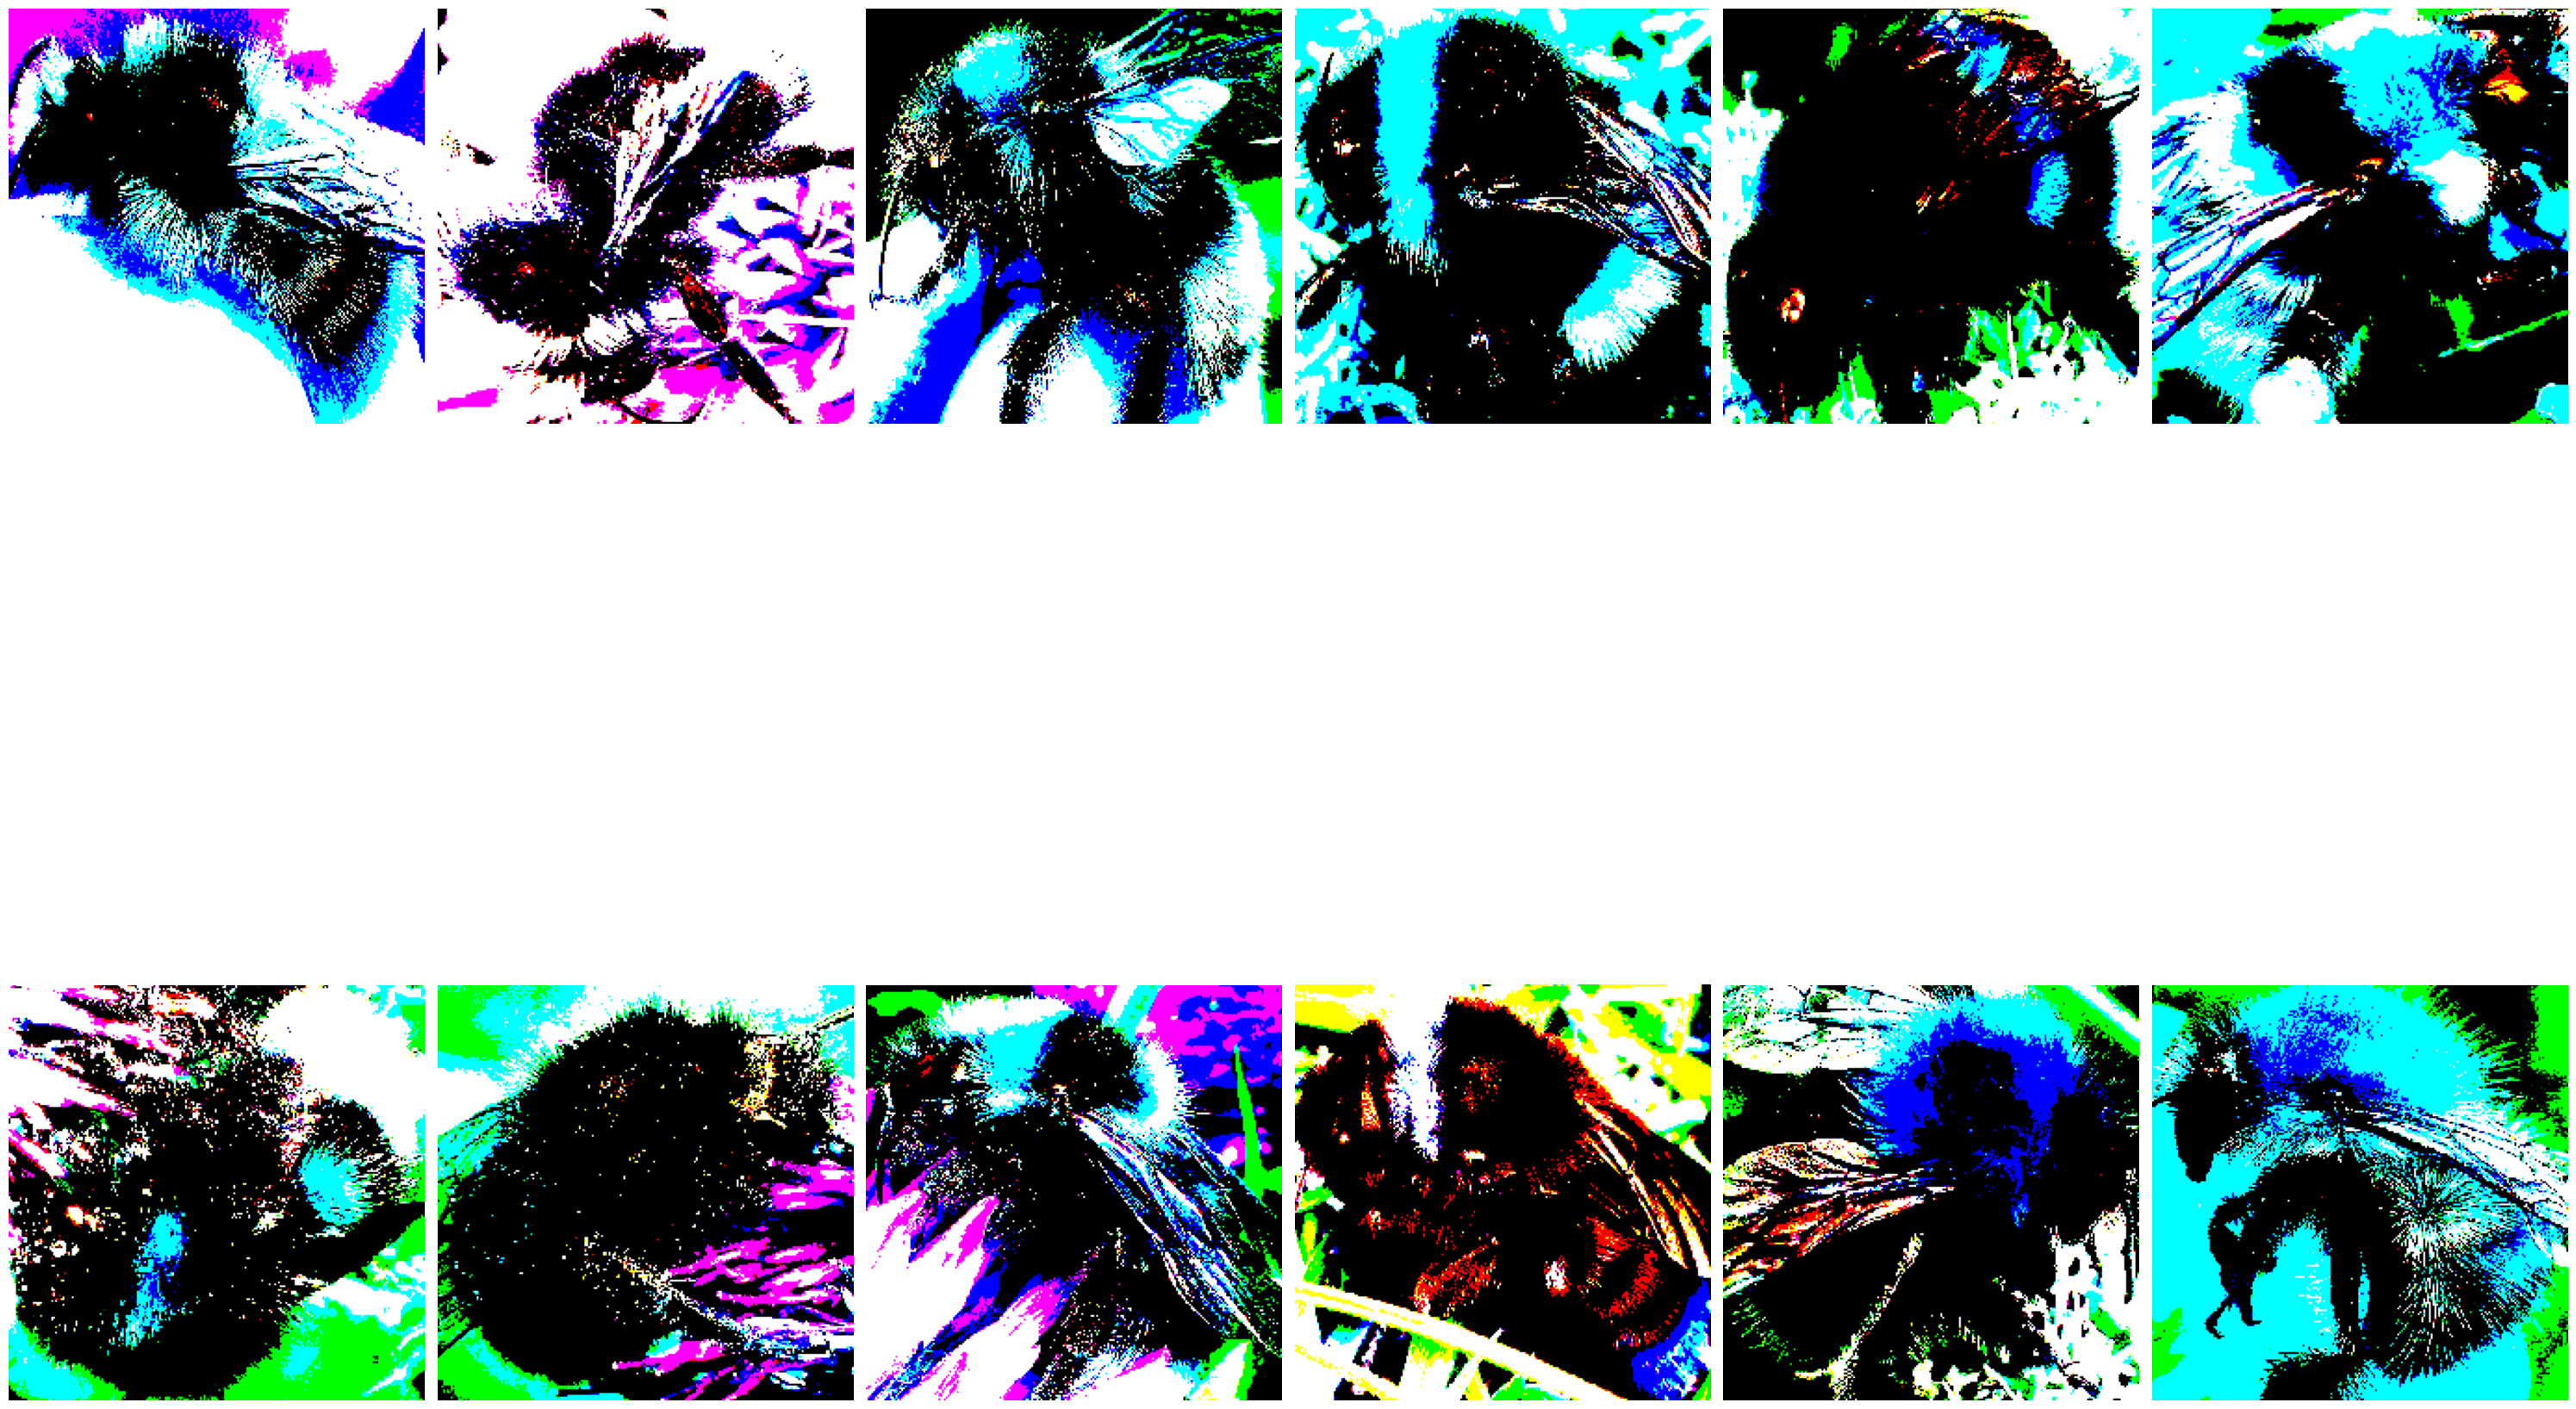

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
imgs, labels = next(train_batches_vgg19)

plotImages(imgs)
print(labels)

In [12]:
vgg19 = tf.keras.applications.vgg19.VGG19(input_shape=(224, 224, 3), 
                                          weights='imagenet',
                                          include_top=False)

In [13]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
type(vgg19)

keras.src.engine.functional.Functional

In [15]:
# model1 = Sequential()
# for layer in vgg19_model.layers[:-1]:
#     model1.add(layer)

In [16]:
# for layer in model1.layers:
#     layer.trainable = False

In [17]:
x_vgg19 = layers.GlobalAveragePooling2D()(vgg19.output)
x_vgg19 = layers.Dense(256, activation='relu')(x_vgg19)
output_vgg19 = layers.Dense(21, activation='softmax')(x_vgg19)

In [18]:
model_vgg19 = models.Model(inputs=vgg19.input, outputs=output_vgg19)

In [19]:
for layer in model_vgg19.layers:
    layer.trainable = False

In [20]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model_vgg19.compile(optimizer=Adam(learning_rate=0.0001), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [22]:
epoch_vgg19 = 10

In [23]:
result_vgg19 = model_vgg19.fit(x=train_batches_vgg19,
                               steps_per_epoch=len(train_batches_vgg19),
                               validation_data=validate_batches_vgg19,
                               validation_steps=len(validate_batches_vgg19),
                               epochs=epoch_vgg19,
                               verbose=2)

Epoch 1/10
8/8 - 45s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 45s/epoch - 6s/step
Epoch 2/10
8/8 - 44s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 44s/epoch - 5s/step
Epoch 3/10
8/8 - 44s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 44s/epoch - 5s/step
Epoch 4/10
8/8 - 44s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 44s/epoch - 6s/step
Epoch 5/10
8/8 - 44s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 44s/epoch - 5s/step
Epoch 6/10
8/8 - 44s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 44s/epoch - 5s/step
Epoch 7/10
8/8 - 67s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 67s/epoch - 8s/step
Epoch 8/10
8/8 - 64s - loss: 11.9609 - accuracy: 0.0476 - val_loss: 12.5528 - val_accuracy: 0.0480 - 64s/epoch - 8s/step
Epoch 9/10
8/8 - 64s - loss: 11.

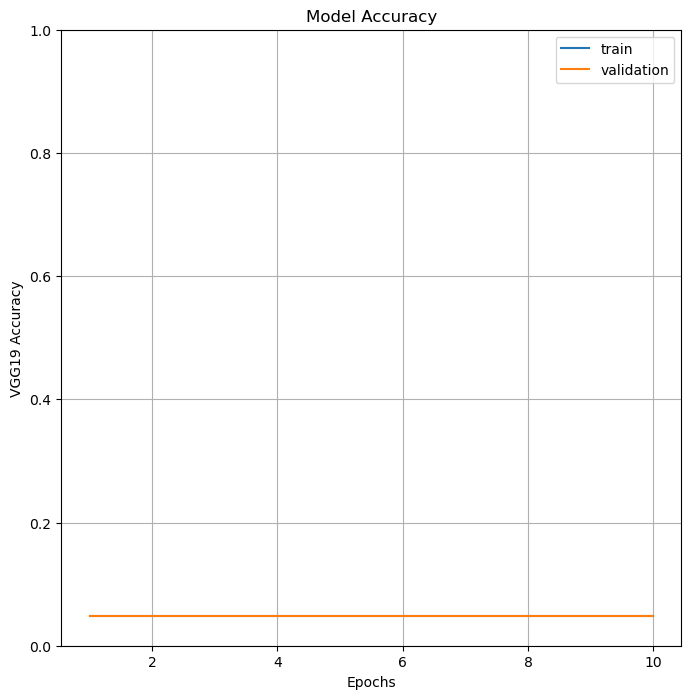

In [24]:
plt.figure(figsize=(8, 8))
epochs_range = range(1, epoch_vgg19 + 1)
plt.plot(epochs_range, result_vgg19.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result_vgg19.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('VGG19 Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 2. ResNet50

In [25]:
train_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)
validate_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

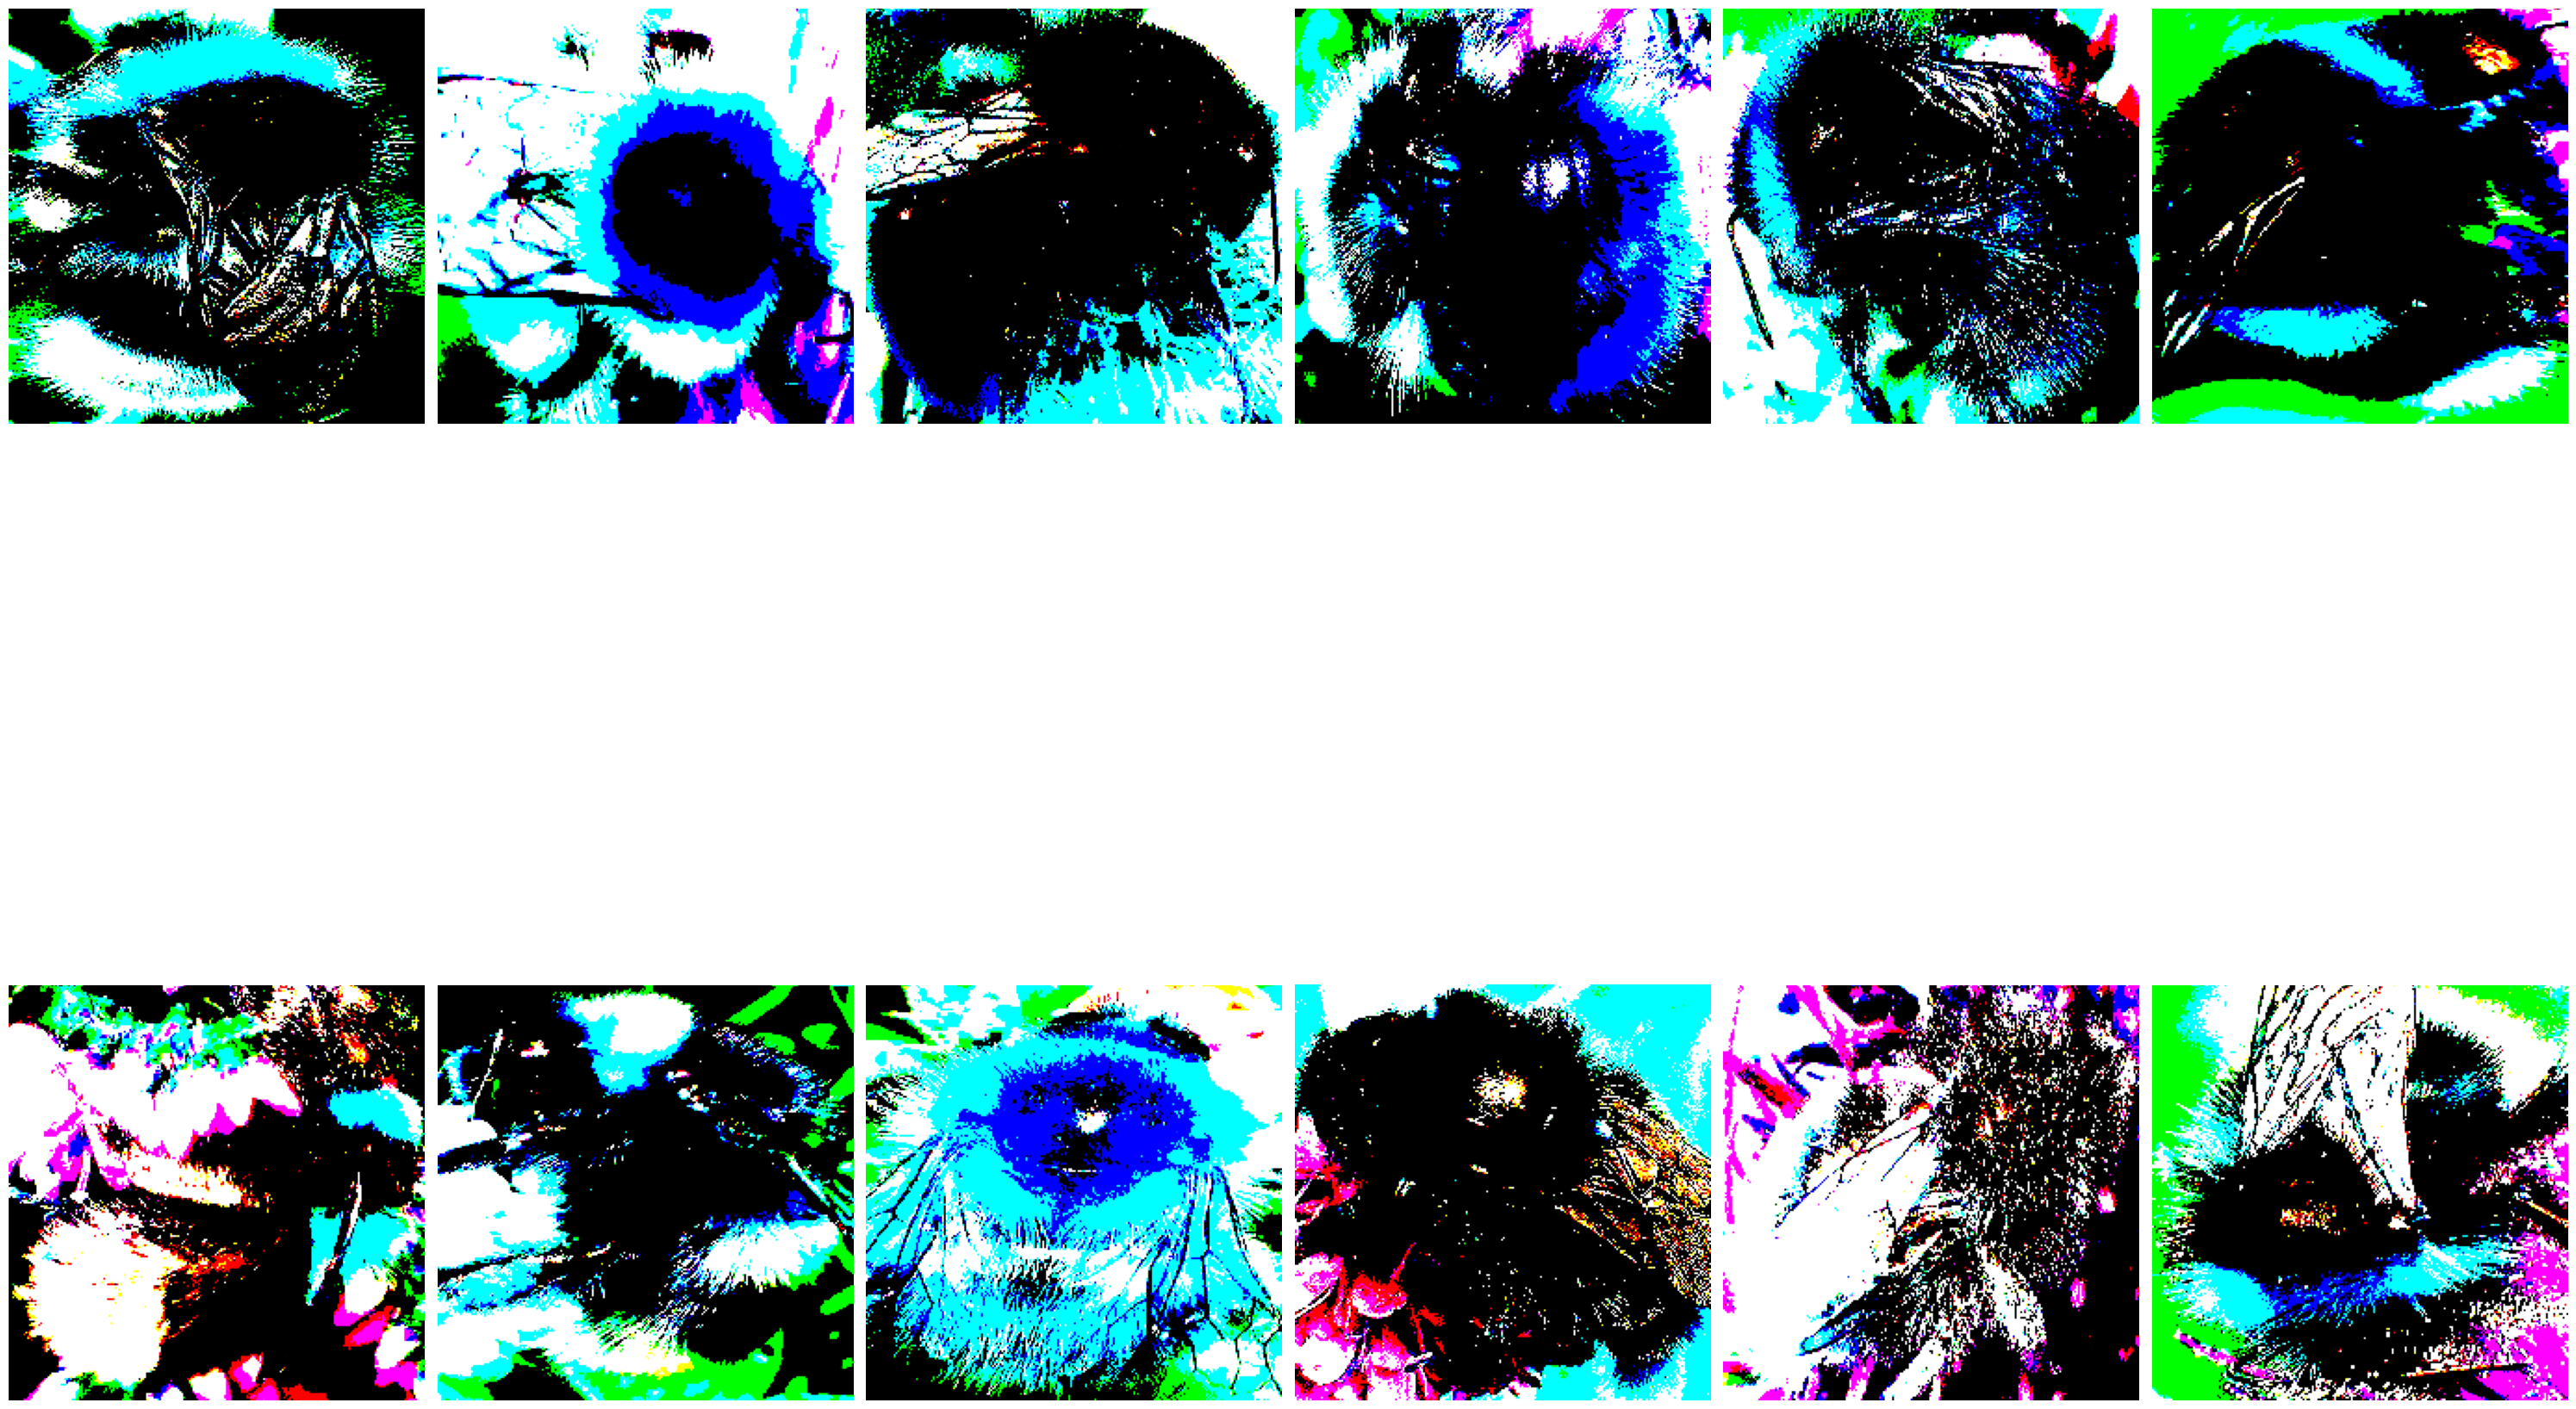

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
imgs, labels = next(train_batches_resnet50)

plotImages(imgs)
print(labels)

In [27]:
resnet50 = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), 
                                          weights='imagenet',
                                          include_top=False)

In [28]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [29]:
type(resnet50)

keras.src.engine.functional.Functional

In [30]:
x_resnet50 = layers.GlobalAveragePooling2D()(resnet50.output)
x_resnet50 = layers.Dense(256, activation='relu')(x_resnet50)
output_resnet50 = layers.Dense(21, activation='softmax')(x_resnet50)

In [31]:
model_resnet50 = models.Model(inputs=resnet50.input, outputs=output_resnet50)

In [32]:
model_resnet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [33]:
model_resnet50.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [34]:
epoch_resnet50 = 10

In [35]:
result_resnet50 = model_resnet50.fit(x=train_batches_resnet50,
                                     steps_per_epoch=len(train_batches_resnet50),
                                     validation_data=validate_batches_resnet50,
                                     validation_steps=len(validate_batches_resnet50),
                                     epochs=epoch_resnet50,
                                     verbose=2)

Epoch 1/10
8/8 - 71s - loss: 2.8996 - accuracy: 0.1806 - val_loss: 7.4815 - val_accuracy: 0.1200 - 71s/epoch - 9s/step
Epoch 2/10
8/8 - 36s - loss: 1.5252 - accuracy: 0.5813 - val_loss: 14.0234 - val_accuracy: 0.1040 - 36s/epoch - 5s/step
Epoch 3/10
8/8 - 33s - loss: 0.5985 - accuracy: 0.8552 - val_loss: 9.5378 - val_accuracy: 0.0720 - 33s/epoch - 4s/step
Epoch 4/10
8/8 - 33s - loss: 0.2507 - accuracy: 0.9286 - val_loss: 12.0795 - val_accuracy: 0.0960 - 33s/epoch - 4s/step
Epoch 5/10
8/8 - 33s - loss: 0.1211 - accuracy: 0.9683 - val_loss: 26.8237 - val_accuracy: 0.0400 - 33s/epoch - 4s/step
Epoch 6/10
8/8 - 33s - loss: 0.1560 - accuracy: 0.9702 - val_loss: 19.6134 - val_accuracy: 0.0720 - 33s/epoch - 4s/step
Epoch 7/10
8/8 - 33s - loss: 0.2022 - accuracy: 0.9405 - val_loss: 25.3920 - val_accuracy: 0.0720 - 33s/epoch - 4s/step
Epoch 8/10
8/8 - 33s - loss: 0.2576 - accuracy: 0.9286 - val_loss: 11.7481 - val_accuracy: 0.0720 - 33s/epoch - 4s/step
Epoch 9/10
8/8 - 33s - loss: 0.1870 - accu

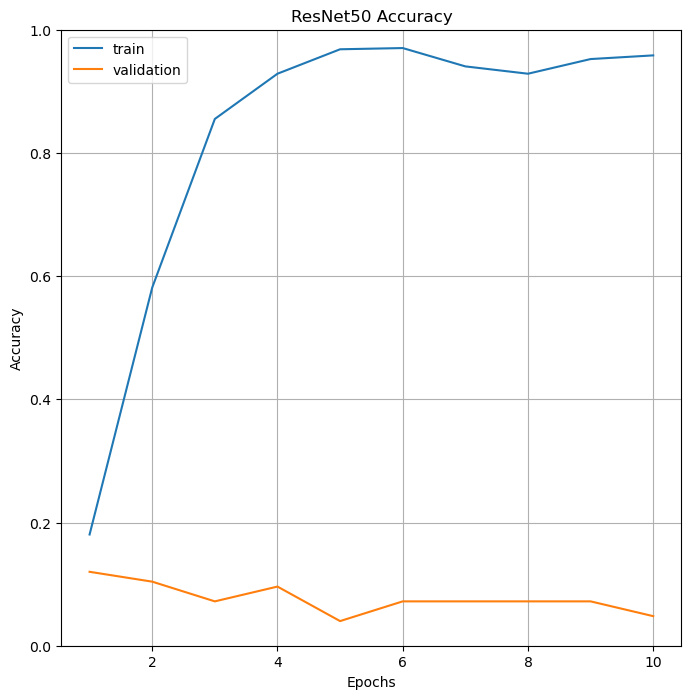

In [36]:
plt.figure(figsize=(8, 8))
epochs_range = range(1, epoch_resnet50 + 1)
plt.plot(epochs_range, result_resnet50.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result_resnet50.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('ResNet50 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 3. InceptionV3

In [37]:
train_batches_inceptionv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(299, 299), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)
validate_batches_inceptionv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(299, 299), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

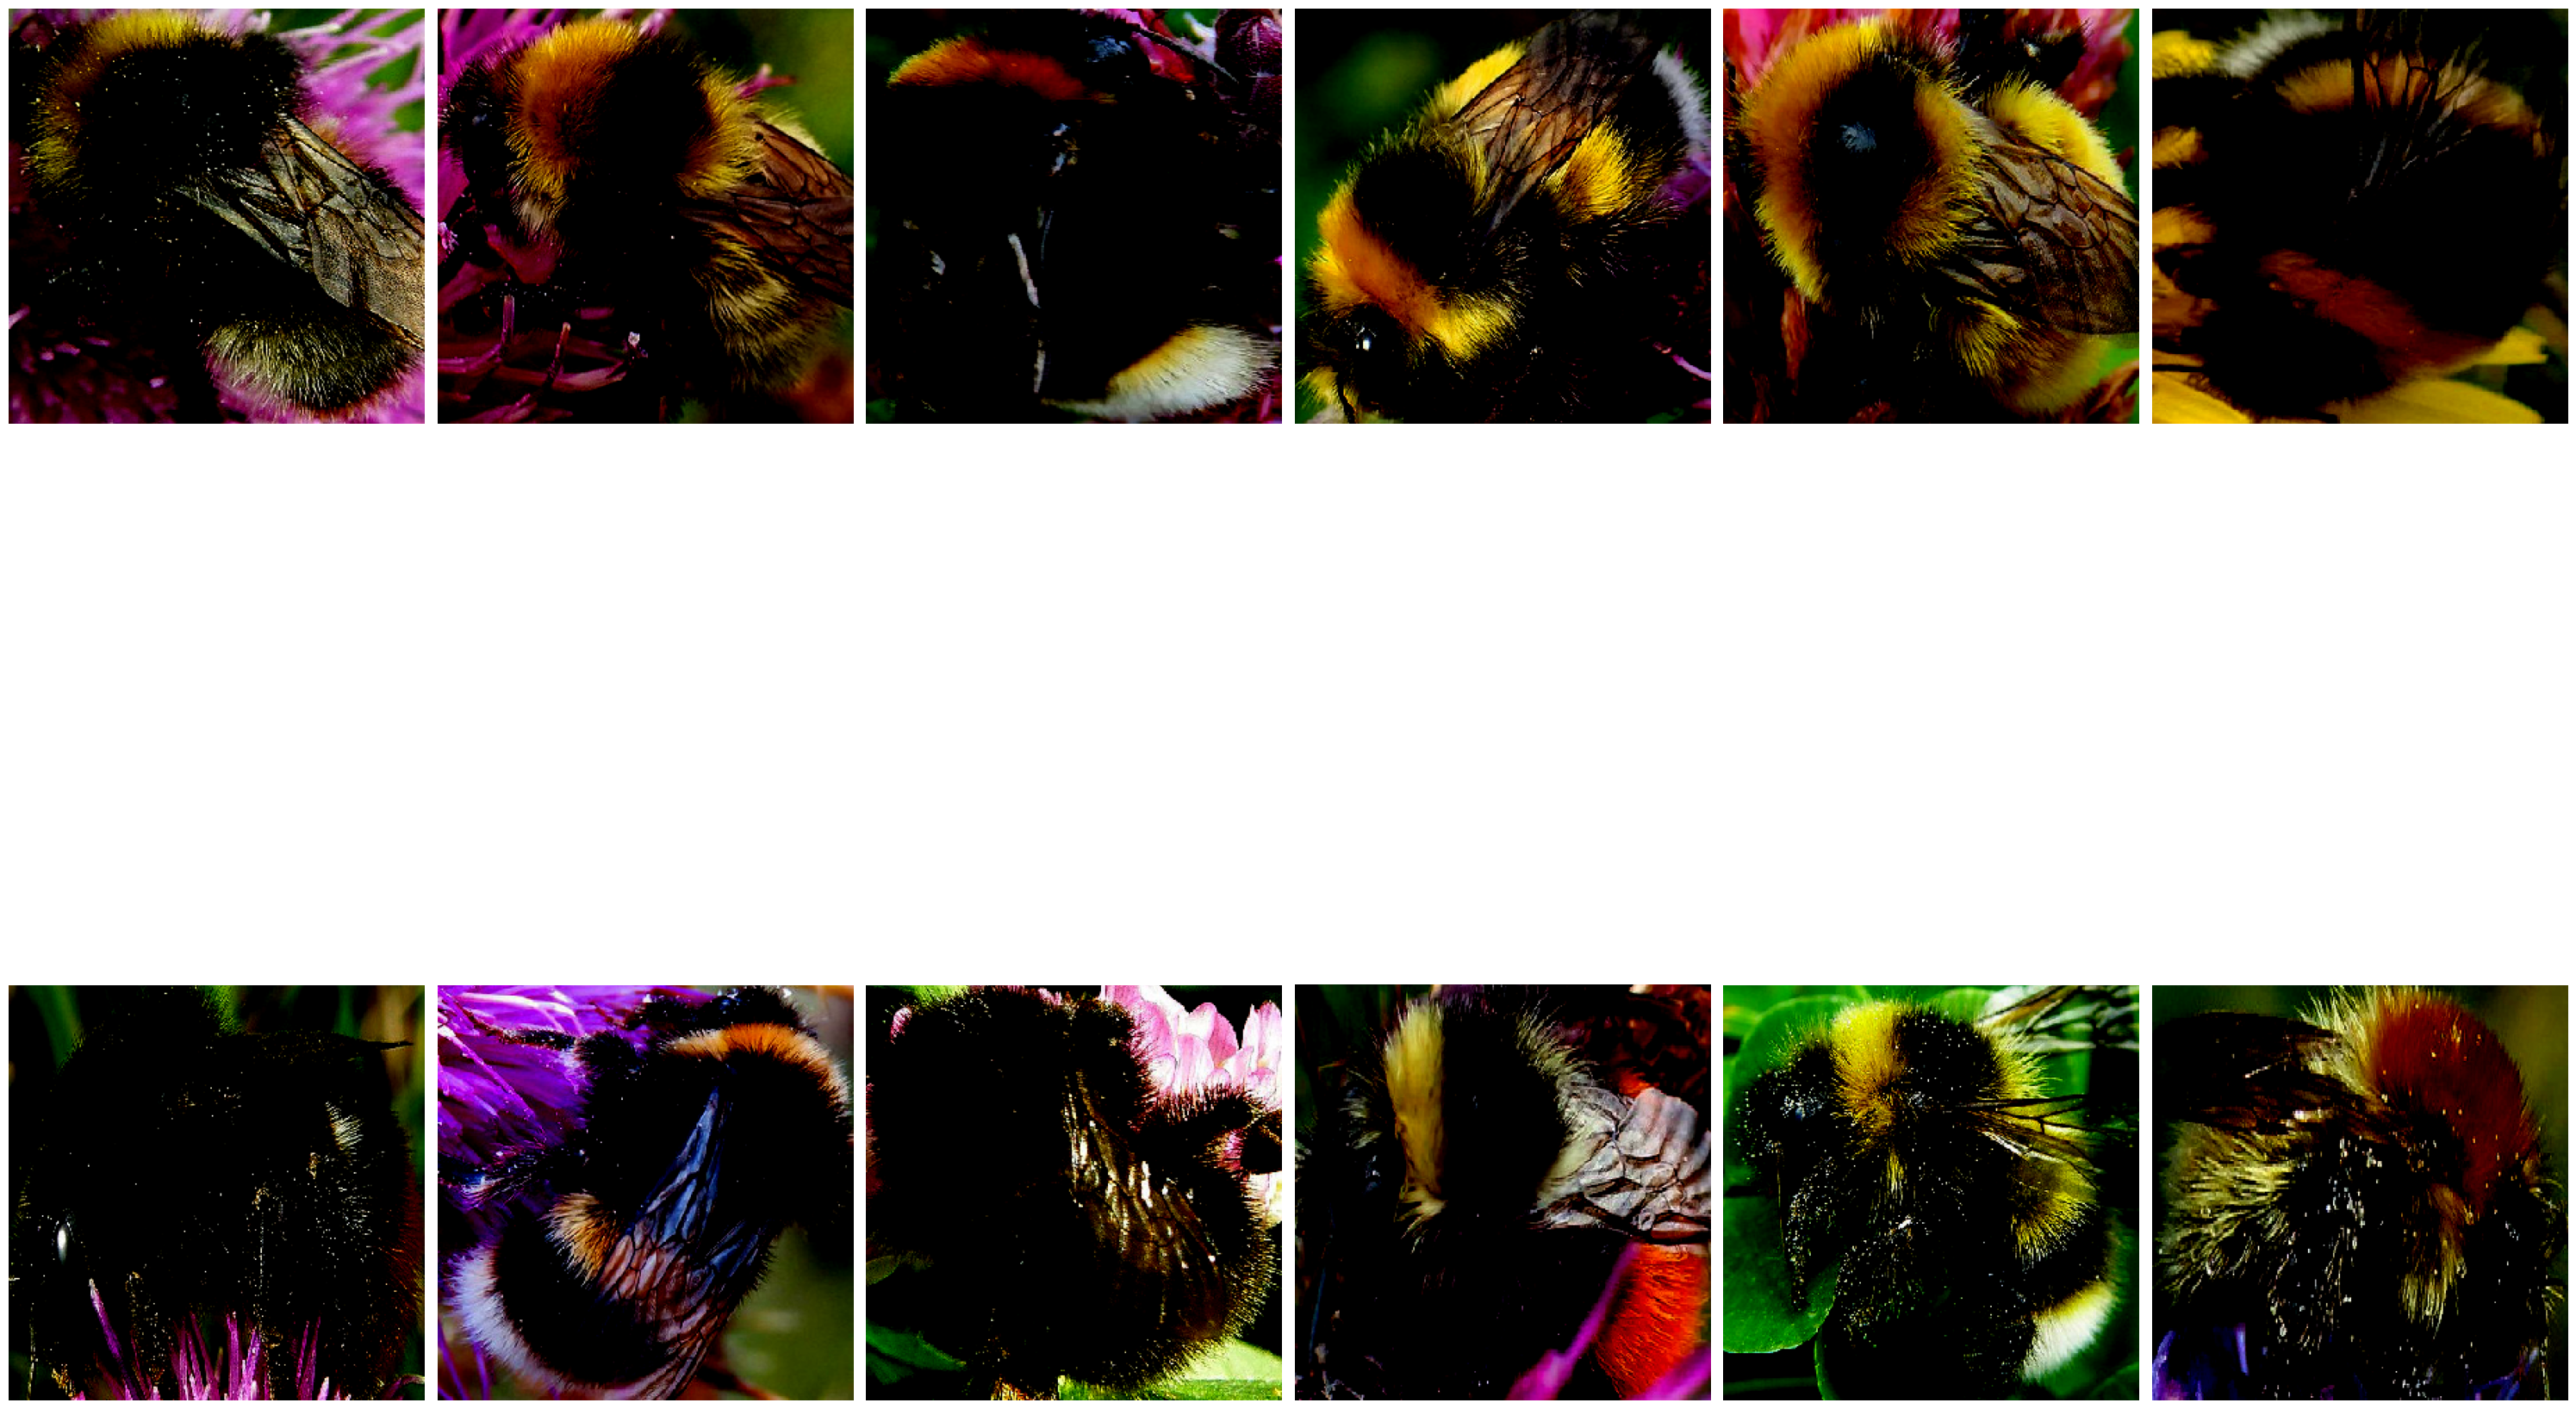

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
imgs, labels = next(train_batches_inceptionv3)

plotImages(imgs)
print(labels)

In [39]:
inceptionv3 = tf.keras.applications.InceptionV3(input_shape=(299, 299, 3),
                                                weights='imagenet',
                                                include_top=False)

In [40]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 35, 35, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 35, 35, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 35, 35, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 17, 17, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 17, 17, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 17, 17, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [41]:
x_inceptionv3 = layers.GlobalAveragePooling2D()(inceptionv3.output)
x_inceptionv3 = layers.Dense(256, activation='relu')(x_inceptionv3)
output_inceptionv3 = layers.Dense(21, activation='softmax')(x_inceptionv3)

In [42]:
model_inceptionv3 = models.Model(inputs=inceptionv3.input, outputs=output_inceptionv3)

In [43]:
model_inceptionv3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

 conv2d_11 (Conv2D)          (None, 35, 35, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 35, 35, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 35, 35, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 17, 17, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 17, 17, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 17, 17, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [44]:
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [45]:
epoch_inceptionv3 = 10

In [46]:
result_inceptionv3 = model_inceptionv3.fit(x=train_batches_inceptionv3,
                                           steps_per_epoch=len(train_batches_inceptionv3),
                                           validation_data=validate_batches_inceptionv3,
                                           validation_steps=len(validate_batches_inceptionv3),
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

Epoch 1/10
8/8 - 50s - loss: 2.8379 - accuracy: 0.1825 - val_loss: 3.3974 - val_accuracy: 0.0480 - 50s/epoch - 6s/step
Epoch 2/10
8/8 - 42s - loss: 1.4091 - accuracy: 0.5694 - val_loss: 3.5255 - val_accuracy: 0.0880 - 42s/epoch - 5s/step
Epoch 3/10
8/8 - 42s - loss: 0.5318 - accuracy: 0.8433 - val_loss: 7.0113 - val_accuracy: 0.0480 - 42s/epoch - 5s/step
Epoch 4/10
8/8 - 79s - loss: 0.2521 - accuracy: 0.9206 - val_loss: 7.1562 - val_accuracy: 0.0560 - 79s/epoch - 10s/step
Epoch 5/10
8/8 - 67s - loss: 0.2087 - accuracy: 0.9425 - val_loss: 4.7351 - val_accuracy: 0.0880 - 67s/epoch - 8s/step
Epoch 6/10
8/8 - 59s - loss: 0.2299 - accuracy: 0.9226 - val_loss: 4.9352 - val_accuracy: 0.0560 - 59s/epoch - 7s/step
Epoch 7/10
8/8 - 59s - loss: 0.2301 - accuracy: 0.9226 - val_loss: 7.1004 - val_accuracy: 0.0560 - 59s/epoch - 7s/step
Epoch 8/10
8/8 - 60s - loss: 0.1774 - accuracy: 0.9464 - val_loss: 4.9941 - val_accuracy: 0.0720 - 60s/epoch - 7s/step
Epoch 9/10
8/8 - 60s - loss: 0.1344 - accuracy:

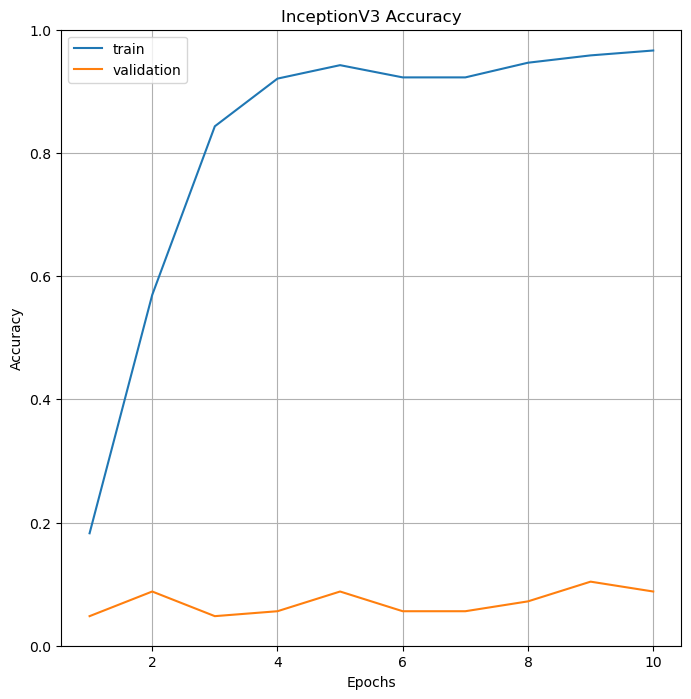

In [47]:
plt.figure(figsize=(8, 8))
epochs_range = range(1, epoch_inceptionv3 + 1)
plt.plot(epochs_range, result_inceptionv3.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result_inceptionv3.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('InceptionV3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### 4. MobileNetV3

In [48]:
train_batches_mobilenetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)
validate_batches_mobilenetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224, 224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=64)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

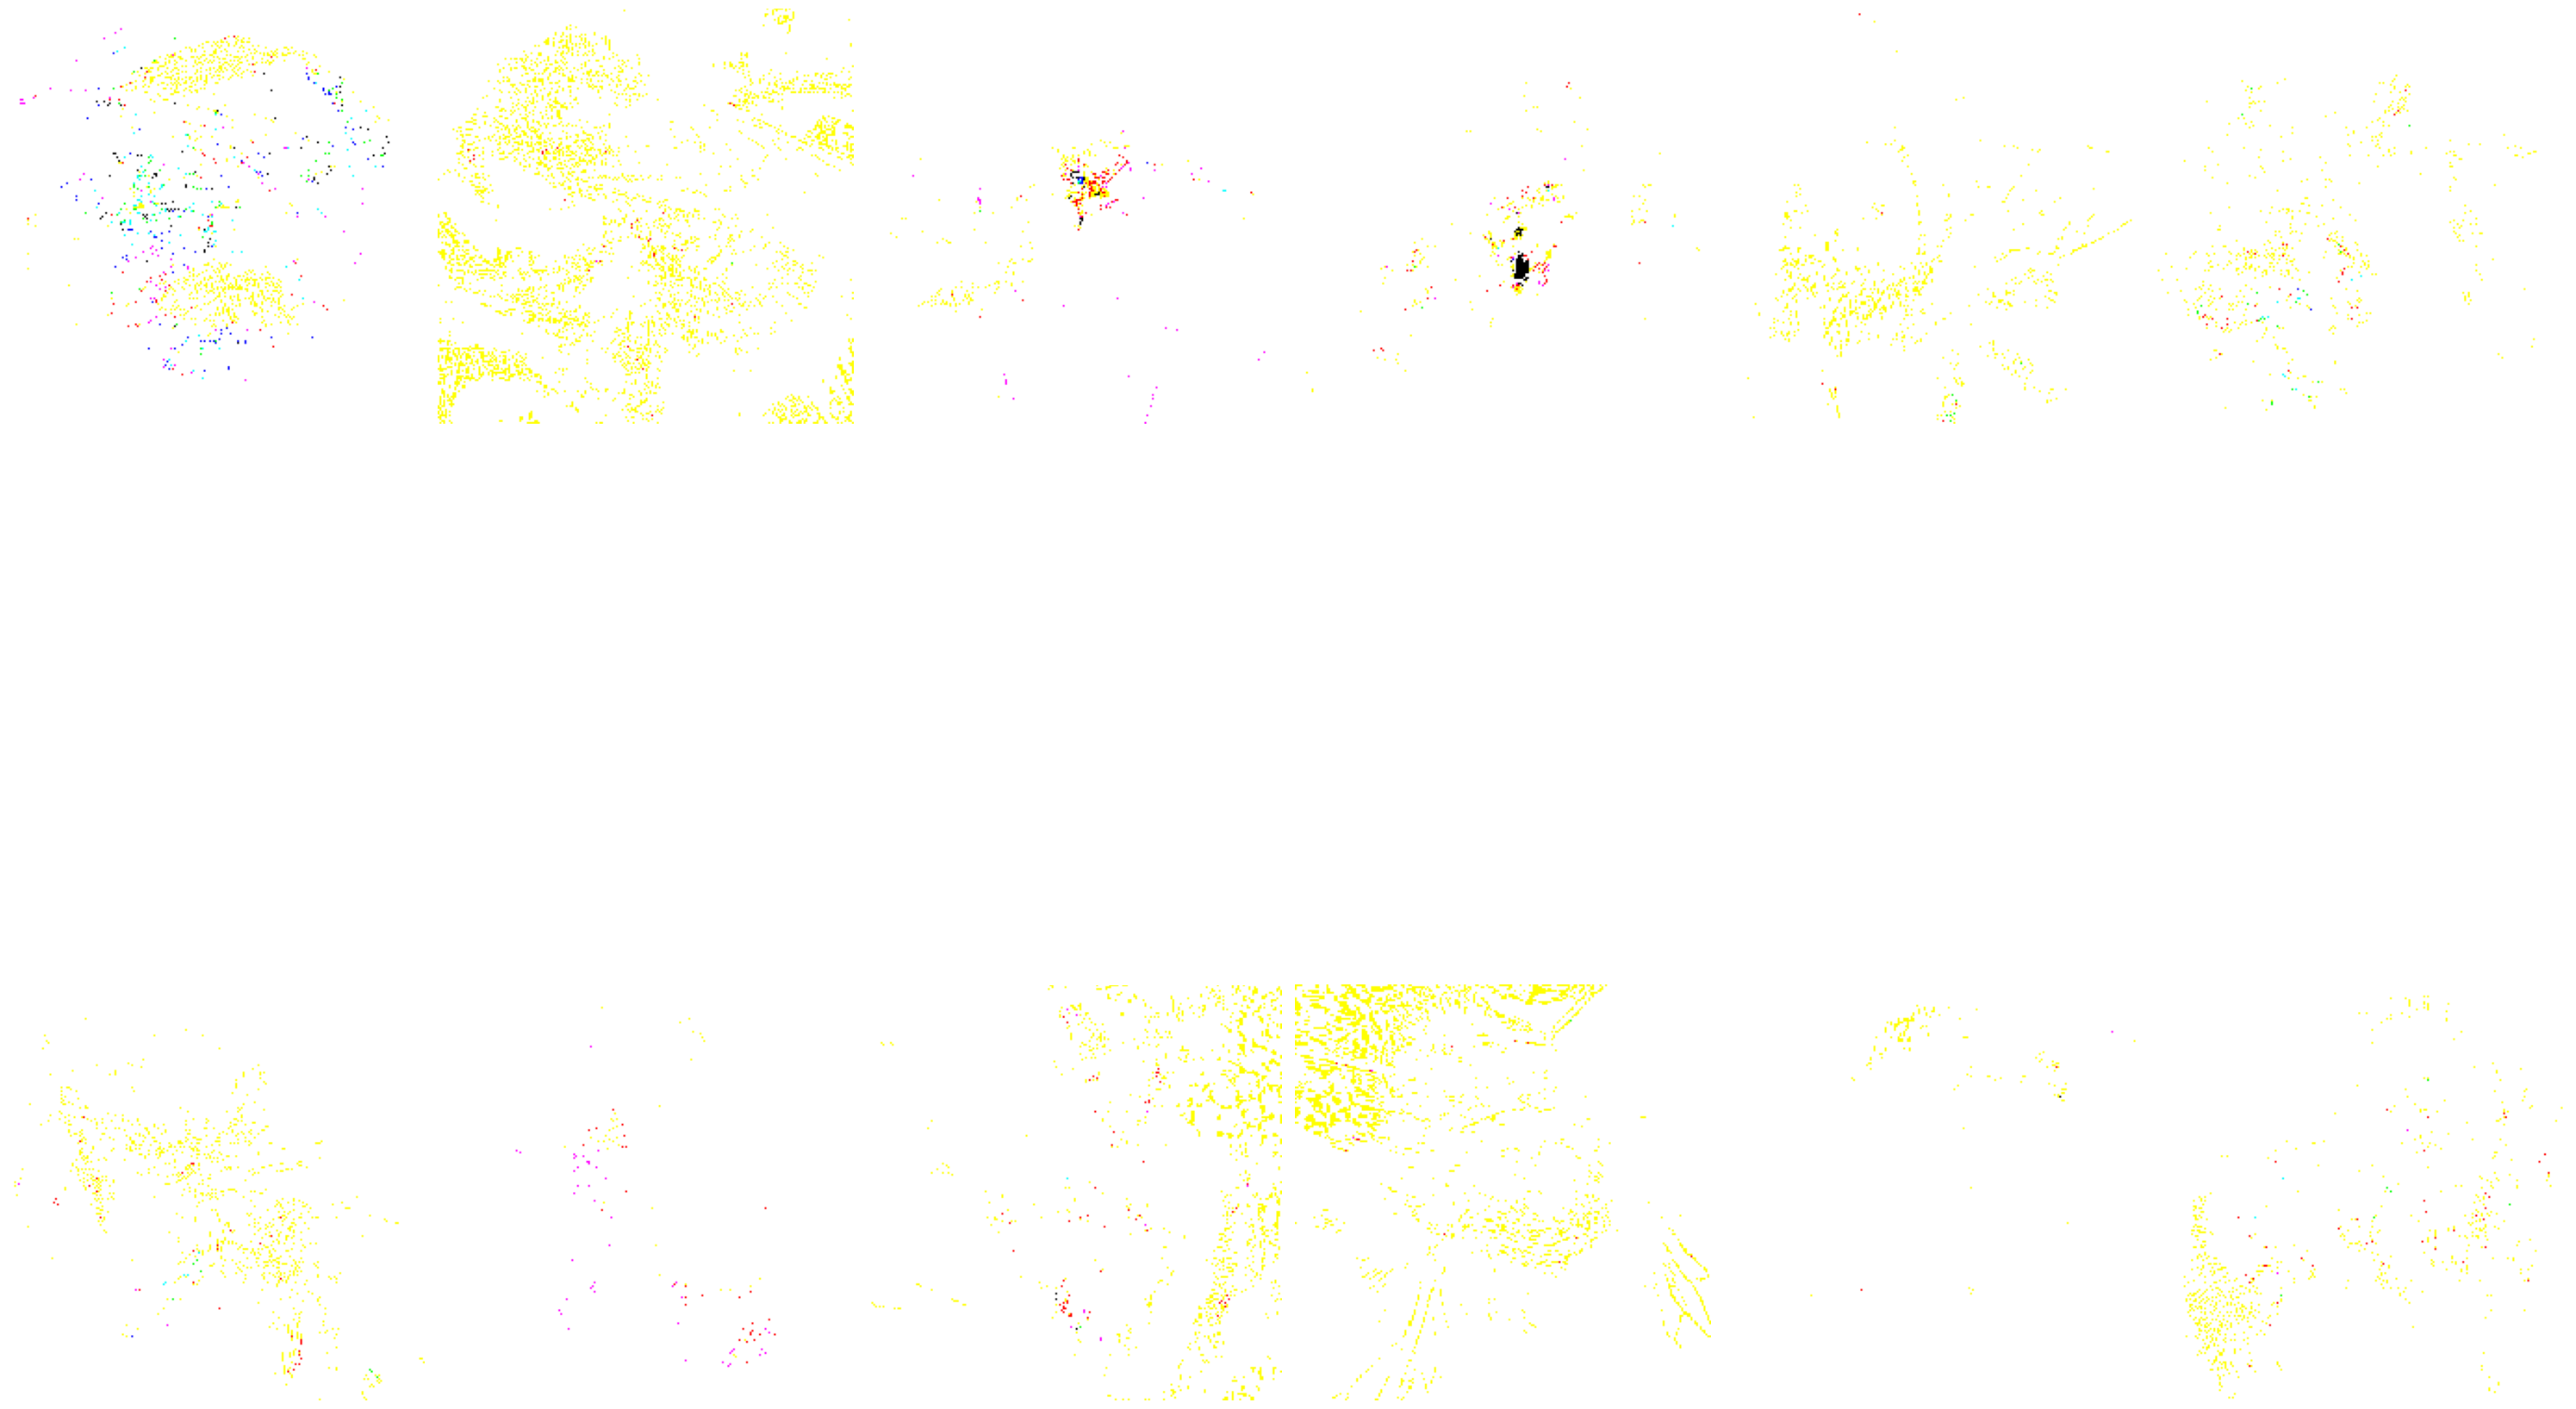

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
imgs, labels = next(train_batches_mobilenetv3)

plotImages(imgs)
print(labels)

In [50]:
mobilenetv3 = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3),
                                                     weights='imagenet',
                                                     include_top=False)

In [51]:
mobilenetv3.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                         

 expanded_conv_2/depthwise   (None, 56, 56, 72)           648       ['re_lu_4[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_2/depthwise/  (None, 56, 56, 72)           288       ['expanded_conv_2/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_5 (ReLU)              (None, 56, 56, 72)           0         ['expanded_conv_2/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_

                                                                                                  
 re_lu_9 (ReLU)              (None, 28, 28, 120)          0         ['expanded_conv_4/expand/Batch
                                                                    Norm[0][0]']                  
                                                                                                  
 expanded_conv_4/depthwise   (None, 28, 28, 120)          3000      ['re_lu_9[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_4/depthwise/  (None, 28, 28, 120)          480       ['expanded_conv_4/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
          

                                                                                                  
 tf.__operators__.add_3 (TF  (None, 1, 1, 120)            0         ['expanded_conv_5/squeeze_exci
 OpLambda)                                                          te/Conv_1[0][0]']             
                                                                                                  
 re_lu_14 (ReLU)             (None, 1, 1, 120)            0         ['tf.__operators__.add_3[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_3 (TFOpLa  (None, 1, 1, 120)            0         ['re_lu_14[0][0]']            
 mbda)                                                                                            
                                                                                                  
 expanded_

                                                                                                  
 re_lu_17 (ReLU)             (None, 14, 14, 200)          0         ['tf.__operators__.add_6[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_6 (TFOpLa  (None, 14, 14, 200)          0         ['re_lu_17[0][0]']            
 mbda)                                                                                            
                                                                                                  
 multiply_3 (Multiply)       (None, 14, 14, 200)          0         ['expanded_conv_7/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_6[0][0]']  
          

 expanded_conv_8/project (C  (None, 14, 14, 80)           14720     ['multiply_6[0][0]']          
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_8/project/Ba  (None, 14, 14, 80)           320       ['expanded_conv_8/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_8/Add (Add)   (None, 14, 14, 80)           0         ['expanded_conv_7/Add[0][0]', 
                                                                     'expanded_conv_8/project/Batc
                                                                    hNorm[0][0]']                 
          

  (DepthwiseConv2D)                                                                               
                                                                                                  
 expanded_conv_10/depthwise  (None, 14, 14, 480)          1920      ['expanded_conv_10/depthwise[0
 /BatchNorm (BatchNormaliza                                         ][0]']                        
 tion)                                                                                            
                                                                                                  
 tf.__operators__.add_13 (T  (None, 14, 14, 480)          0         ['expanded_conv_10/depthwise/B
 FOpLambda)                                                         atchNorm[0][0]']              
                                                                                                  
 re_lu_24 (ReLU)             (None, 14, 14, 480)          0         ['tf.__operators__.add_13[0][0
          

                                                                                                  
 tf.math.multiply_16 (TFOpL  (None, 14, 14, 672)          0         ['re_lu_27[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_12 (Multiply)      (None, 14, 14, 672)          0         ['expanded_conv_11/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_16[0][0]'] 
                                                                                                  
 expanded_conv_11/squeeze_e  (None, 1, 1, 672)            0         ['multiply_12[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling

                                                                                                  
 multiply_14 (Multiply)      (None, 7, 7, 672)            0         ['expanded_conv_12/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_19[0][0]'] 
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 672)            0         ['multiply_14[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling2D)                                                                                     
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 168)            113064    ['expanded_conv_12/squeeze_exc
 xcite/Con

                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 240)            0         ['expanded_conv_13/squeeze_exc
 xcite/Relu (ReLU)                                                  ite/Conv[0][0]']              
                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 960)            231360    ['expanded_conv_13/squeeze_exc
 xcite/Conv_1 (Conv2D)                                              ite/Relu[0][0]']              
                                                                                                  
 tf.__operators__.add_23 (T  (None, 1, 1, 960)            0         ['expanded_conv_13/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_34 

                                                                                                  
 tf.__operators__.add_26 (T  (None, 1, 1, 960)            0         ['expanded_conv_14/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_37 (ReLU)             (None, 1, 1, 960)            0         ['tf.__operators__.add_26[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_26 (TFOpL  (None, 1, 1, 960)            0         ['re_lu_37[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_

In [52]:
x_mobilenetv3 = layers.GlobalAveragePooling2D()(mobilenetv3.output)
x_mobilenetv3 = layers.Dense(256, activation='relu')(x_mobilenetv3)
output_mobilenetv3 = layers.Dense(21, activation='softmax')(x_mobilenetv3)

In [53]:
model_mobilenetv3 = models.Model(inputs=mobilenetv3.input, outputs=output_mobilenetv3)

In [54]:
model_mobilenetv3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                  

 expanded_conv_2/depthwise   (None, 56, 56, 72)           648       ['re_lu_4[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_2/depthwise/  (None, 56, 56, 72)           288       ['expanded_conv_2/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_5 (ReLU)              (None, 56, 56, 72)           0         ['expanded_conv_2/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_

                                                                                                  
 re_lu_9 (ReLU)              (None, 28, 28, 120)          0         ['expanded_conv_4/expand/Batch
                                                                    Norm[0][0]']                  
                                                                                                  
 expanded_conv_4/depthwise   (None, 28, 28, 120)          3000      ['re_lu_9[0][0]']             
 (DepthwiseConv2D)                                                                                
                                                                                                  
 expanded_conv_4/depthwise/  (None, 28, 28, 120)          480       ['expanded_conv_4/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
          

                                                                                                  
 tf.__operators__.add_3 (TF  (None, 1, 1, 120)            0         ['expanded_conv_5/squeeze_exci
 OpLambda)                                                          te/Conv_1[0][0]']             
                                                                                                  
 re_lu_14 (ReLU)             (None, 1, 1, 120)            0         ['tf.__operators__.add_3[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_3 (TFOpLa  (None, 1, 1, 120)            0         ['re_lu_14[0][0]']            
 mbda)                                                                                            
                                                                                                  
 expanded_

                                                                                                  
 re_lu_17 (ReLU)             (None, 14, 14, 200)          0         ['tf.__operators__.add_6[0][0]
                                                                    ']                            
                                                                                                  
 tf.math.multiply_6 (TFOpLa  (None, 14, 14, 200)          0         ['re_lu_17[0][0]']            
 mbda)                                                                                            
                                                                                                  
 multiply_3 (Multiply)       (None, 14, 14, 200)          0         ['expanded_conv_7/expand/Batch
                                                                    Norm[0][0]',                  
                                                                     'tf.math.multiply_6[0][0]']  
          

 expanded_conv_8/project (C  (None, 14, 14, 80)           14720     ['multiply_6[0][0]']          
 onv2D)                                                                                           
                                                                                                  
 expanded_conv_8/project/Ba  (None, 14, 14, 80)           320       ['expanded_conv_8/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_8/Add (Add)   (None, 14, 14, 80)           0         ['expanded_conv_7/Add[0][0]', 
                                                                     'expanded_conv_8/project/Batc
                                                                    hNorm[0][0]']                 
          

  (DepthwiseConv2D)                                                                               
                                                                                                  
 expanded_conv_10/depthwise  (None, 14, 14, 480)          1920      ['expanded_conv_10/depthwise[0
 /BatchNorm (BatchNormaliza                                         ][0]']                        
 tion)                                                                                            
                                                                                                  
 tf.__operators__.add_13 (T  (None, 14, 14, 480)          0         ['expanded_conv_10/depthwise/B
 FOpLambda)                                                         atchNorm[0][0]']              
                                                                                                  
 re_lu_24 (ReLU)             (None, 14, 14, 480)          0         ['tf.__operators__.add_13[0][0
          

                                                                                                  
 tf.math.multiply_16 (TFOpL  (None, 14, 14, 672)          0         ['re_lu_27[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_12 (Multiply)      (None, 14, 14, 672)          0         ['expanded_conv_11/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_16[0][0]'] 
                                                                                                  
 expanded_conv_11/squeeze_e  (None, 1, 1, 672)            0         ['multiply_12[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling

                                                                                                  
 multiply_14 (Multiply)      (None, 7, 7, 672)            0         ['expanded_conv_12/depthwise/B
                                                                    atchNorm[0][0]',              
                                                                     'tf.math.multiply_19[0][0]'] 
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 672)            0         ['multiply_14[0][0]']         
 xcite/AvgPool (GlobalAvera                                                                       
 gePooling2D)                                                                                     
                                                                                                  
 expanded_conv_12/squeeze_e  (None, 1, 1, 168)            113064    ['expanded_conv_12/squeeze_exc
 xcite/Con

                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 240)            0         ['expanded_conv_13/squeeze_exc
 xcite/Relu (ReLU)                                                  ite/Conv[0][0]']              
                                                                                                  
 expanded_conv_13/squeeze_e  (None, 1, 1, 960)            231360    ['expanded_conv_13/squeeze_exc
 xcite/Conv_1 (Conv2D)                                              ite/Relu[0][0]']              
                                                                                                  
 tf.__operators__.add_23 (T  (None, 1, 1, 960)            0         ['expanded_conv_13/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_34 

                                                                                                  
 tf.__operators__.add_26 (T  (None, 1, 1, 960)            0         ['expanded_conv_14/squeeze_exc
 FOpLambda)                                                         ite/Conv_1[0][0]']            
                                                                                                  
 re_lu_37 (ReLU)             (None, 1, 1, 960)            0         ['tf.__operators__.add_26[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_26 (TFOpL  (None, 1, 1, 960)            0         ['re_lu_37[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_

In [55]:
model_mobilenetv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [56]:
epoch_mobilenetv3 = 10

In [ ]:
result_mobilenetv3 = model_mobilenetv3.fit(x=train_batches_mobilenetv3,
                                           steps_per_epoch=len(train_batches_mobilenetv3),
                                           validation_data=validate_batches_mobilenetv3,
                                           validation_steps=len(validate_batches_mobilenetv3),
                                           epochs=epoch_mobilenetv3,
                                           verbose=2)

Epoch 1/10
8/8 - 23s - loss: 2.9984 - accuracy: 0.1508 - val_loss: 3.4564 - val_accuracy: 0.0640 - 23s/epoch - 3s/step
Epoch 2/10
8/8 - 12s - loss: 1.1050 - accuracy: 0.8690 - val_loss: 3.5080 - val_accuracy: 0.0960 - 12s/epoch - 1s/step
Epoch 3/10
8/8 - 11s - loss: 0.1791 - accuracy: 0.9921 - val_loss: 4.1404 - val_accuracy: 0.1200 - 11s/epoch - 1s/step
Epoch 4/10
8/8 - 11s - loss: 0.0271 - accuracy: 1.0000 - val_loss: 5.3270 - val_accuracy: 0.1280 - 11s/epoch - 1s/step
Epoch 5/10
8/8 - 11s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 5.4998 - val_accuracy: 0.1520 - 11s/epoch - 1s/step
Epoch 6/10
8/8 - 11s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 5.5936 - val_accuracy: 0.1600 - 11s/epoch - 1s/step
Epoch 7/10
8/8 - 12s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.5948 - val_accuracy: 0.1520 - 12s/epoch - 1s/step
Epoch 8/10


In [ ]:
plt.figure(figsize=(8, 8))
epochs_range = range(1, epoch_mobilenetv3 + 1)
plt.plot(epochs_range, result_mobilenetv3.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, result_mobilenetv3.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('MobileNetV3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()